In [ ]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

nb_lat=2041 #1/12
nb_lon=4320 #1/12
coef_down = 2

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // coef_down for size in (nb_lat, nb_lon)]

print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=da.lat.min(), stop=da.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=da.lon.min(), stop=da.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da


folder_data = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys = "glorys_multivar_15m_2018.nc"
maps_glorys = xr.open_dataset(folder_data+file_glorys).sel(time='2018-01-01')
maps_glorys = maps_glorys.rename({"latitude": "lat"})
maps_glorys = maps_glorys.rename({"longitude": "lon"})

#lat = maps_glorys.latitude
#lon = maps_glorys.longitude

maps_glorys = regrid_da(new_sizes,maps_glorys)

new sizes: [1020, 2160]


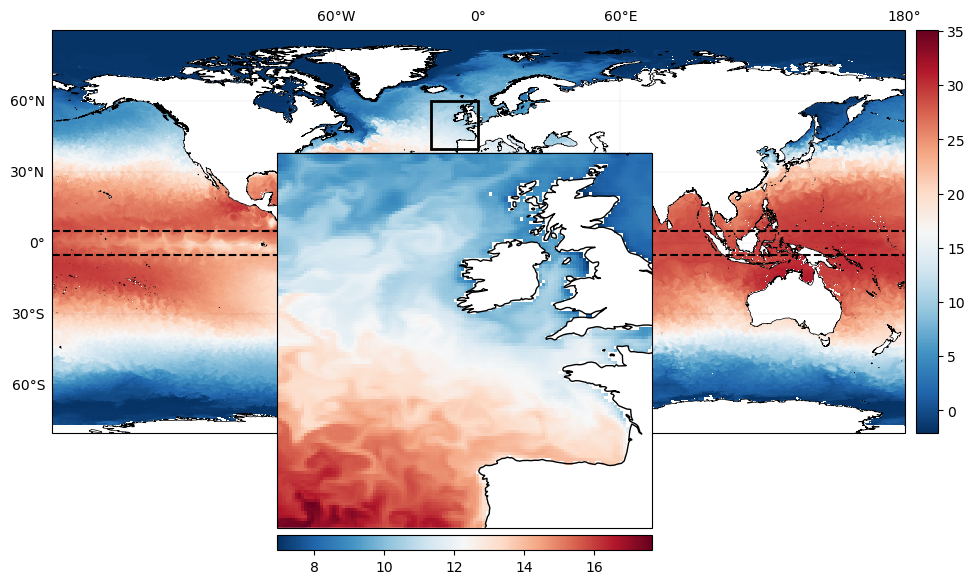

In [17]:
sys.path.append("../tools")
from plot_tools import plot_uv_map,plot_map_zoom
plot_map_zoom(maps_glorys.thetao[0,:],maps_glorys.lon,maps_glorys.lat)

In [24]:
folder_data = "/Odyssey/private/t22picar/data/sst_L4/"
file_glorys = "SST_L4_OSTIA_2019.nc"
maps_glorys = xr.open_dataset(folder_data+file_glorys).sel(time='2019-02-01')
maps_glorys = maps_glorys.rename({"latitude": "lat"})
maps_glorys = maps_glorys.rename({"longitude": "lon"})

In [25]:
maps_glorys = regrid_da(new_sizes,maps_glorys)

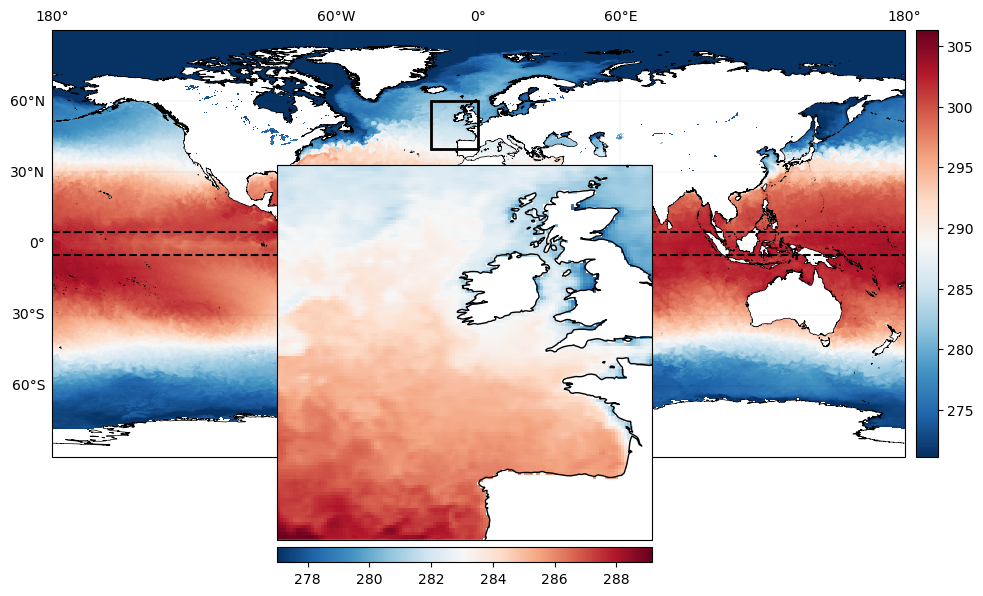

In [26]:
plot_map_zoom(maps_glorys.analysed_sst[:],maps_glorys.lon,maps_glorys.lat)

In [9]:
for year in range(2012,2013):
    print(year)
    file_glorys = f"glorys_multivar_15m_{year}.nc"
    maps_glorys_i = xr.open_dataset(folder_data+file_glorys)
    print("Interpolation ... ")
    maps_glorys_i = maps_glorys_i.rename({"latitude": "lat"})
    maps_glorys_i = maps_glorys_i.rename({"longitude": "lon"})  
    maps_glorys_i = regrid_da(new_sizes,maps_glorys_i)
    print("Interpolation done ")
    print("Concatenation ... ")
    maps_glorys = xr.concat([maps_glorys, maps_glorys_i], dim='time')
    print("Concatenation done ")

2012
Interpolation ... 
Interpolation done 
Concatenation ... 
Concatenation done 


In [10]:
maps_glorys.sel(depth=maps_glorys.depth[0])

<xarray.Dataset> Size: 29GB
Dimensions:  (time: 731, lat: 680, lon: 1440)
Coordinates:
    depth    float32 4B 15.81
  * time     (time) datetime64[ns] 6kB 2018-01-01 2018-01-02 ... 2012-12-31
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    mlotst   (time, lat, lon) float64 6GB nan nan nan nan ... nan nan nan nan
    uo       (time, lat, lon) float64 6GB nan nan nan nan ... nan nan nan nan
    vo       (time, lat, lon) float64 6GB nan nan nan nan ... nan nan nan nan
    zos      (time, lat, lon) float64 6GB nan nan nan nan ... nan nan nan nan
    thetao   (time, lat, lon) float64 6GB nan nan nan nan ... nan nan nan nan
Attributes:
    references:                http://www.mercator-ocean.fr
    title:                     daily mean fields from Global Ocean Physics An...
    comment:                   CMEMS product
    Conventions:               CF-1.4
    institution:               MERCATOR OCEAN
    source:                    MERCATOR GLORYS12V1
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    copernicusmarine_version:  2.0.1

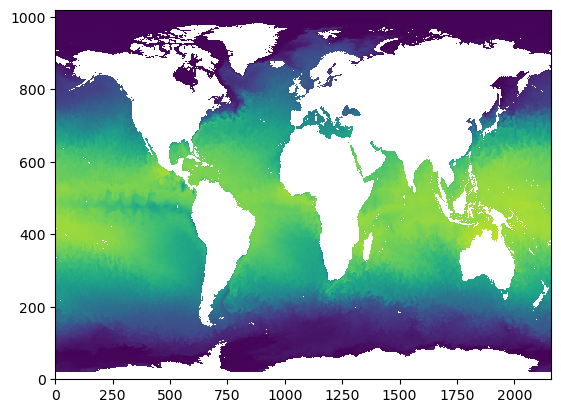

In [9]:
plt.pcolormesh(maps_glorys.thetao[0])

In [ ]:
# save data 
save_file="glorys_multivar_15m_2010-2018.nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_glorys.to_netcdf(folder_data+save_file)
